In [1]:
#Author: TC Chakraborty
#website: https://tc25.github.io/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [2]:
#Read csv file created by GEE
Dat=pd.read_csv('NewHaven_censustracts.csv')
print(Dat)

            system:index  BT_Landsat  Crime_Rate     GEOID10        LST  \
0   00000000000000000001  298.816466         9.4  9009141300  31.174641   
1   00000000000000000005  300.478707         6.0  9009361402  35.550128   
2   00000000000000000006  300.896095         9.2  9009361401  36.226215   
3   00000000000000000007  298.898581         7.8  9009142603  32.224167   
4   00000000000000000008  302.570994        32.0  9009140100  36.418080   
5   0000000000000000000a  302.461682        26.7  9009140300  35.745445   
6   0000000000000000000c  302.463864        20.2  9009140600  35.106278   
7   0000000000000000000d  302.718596        24.5  9009140700  35.312243   
8   0000000000000000000f  300.930592        22.5  9009140900  34.159067   
9   00000000000000000016  302.422408        23.7  9009141600  35.128846   
10  00000000000000000017  299.961905         7.7  9009141800  33.917270   
11  00000000000000000019  301.671281         5.3  9009142000  35.335142   
12  0000000000000000001a 

In [3]:
#Run linear regression between NDVI and LST
slope, intercept, r_value, p_value, std_err = linregress(Dat['NDVI'],Dat['LST'])

In [4]:
print("r-squared: %f" %(r_value*r_value))

r-squared: 0.814631


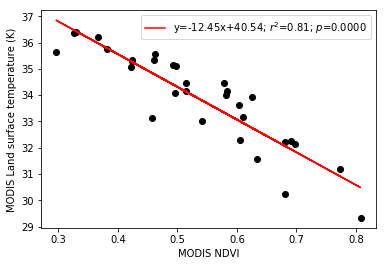

In [5]:
#Plot scatter and best fit line for linear regression
plt.plot(Dat['NDVI'],Dat['LST'], 'o', color='k', label='_nolegend_')
plt.plot(Dat['NDVI'], intercept + slope*Dat['NDVI'], 'r', label='y={:.2f}x+{:.2f}; $r^2$={:.2f}; $p$={:.4f}'.format(slope,intercept,(r_value*r_value),p_value))
plt.legend()
plt.xlabel("MODIS NDVI")
plt.ylabel("MODIS Land surface temperature (K)")
plt.show()

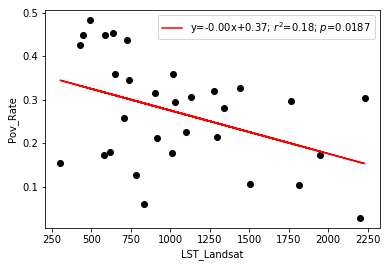

In [50]:
Dat1=Dat['Tree_count']
Dat2=Dat['Pov_Rate']

#Run linear regression between NDVI and LST
slope, intercept, r_value, p_value, std_err = linregress(Dat1,Dat2)
#Plot scatter and best fit line for linear regression
plt.plot(Dat1,Dat2, 'o', color='k', label='_nolegend_')
plt.plot(Dat1, intercept + slope*Dat1, 'r', label='y={:.2f}x+{:.2f}; $r^2$={:.2f}; $p$={:.4f}'.format(slope,intercept,(r_value*r_value),p_value))
plt.legend()
plt.xlabel('LST_Landsat')
plt.ylabel('Pov_Rate')
plt.show()


In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import seaborn as sns

In [7]:
#load shapefiles and change their projections to the same one
Trees=gpd.read_file('Trees.shp')
Trees=Trees.to_crs({'init': 'epsg:4326'})
NewHaven=gpd.read_file('NH_Census_income_joined.shp')
NewHaven=NewHaven.to_crs({'init': 'epsg:4326'})
#Trees.head()
#Extract lat lon columns from the geometry column
Trees['lon'] = Trees['geometry'].x
Trees['lat'] = Trees['geometry'].y
#Trees.head()
NewHaven['HC01_VC85'] = NewHaven['HC01_VC85'].astype('int64')

NameError: name 'gpd' is not defined

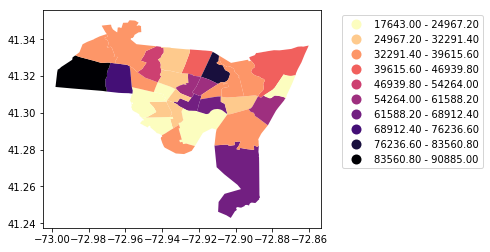

In [15]:
#Trees.plot()
ax=NewHaven.plot(column='HC01_VC85', scheme='equal_interval',k=10, legend=True,cmap='magma_r',)
ax.get_legend().set_bbox_to_anchor((1.6, 1))

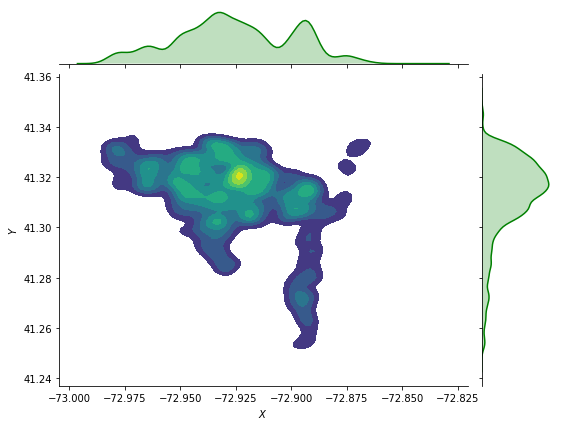

In [16]:
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

g = sns.jointplot(x='lon', y='lat', data=Trees, kind="kde", cmap='viridis', n_levels=10, shade=True, color="g")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");
g.fig.set_figwidth(8)
g.fig.set_figheight(6)

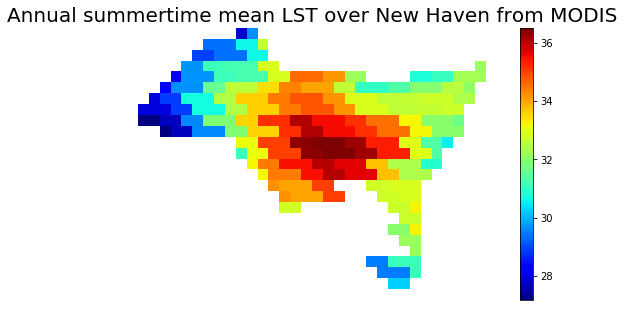

In [17]:
import rasterio as rio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
with rio.open('NewHaven_LST.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    LST = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

fig, ax = plt.subplots(figsize = (12,5))
LST_plot = ax.imshow(LST, 
                       cmap='jet')
ax.set_title("Annual summertime mean LST over New Haven from MODIS", fontsize= 20)
fig.colorbar(LST_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

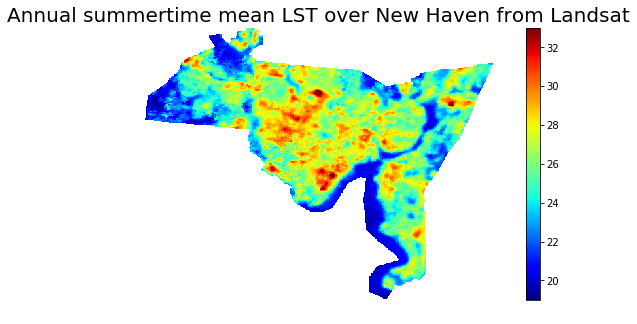

In [18]:
##Plot Landsat
with rio.open('NewHaven_Landsat_Radiance_BT_ENVI.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    LST = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

fig, ax = plt.subplots(figsize = (12,5))
LST_plot = ax.imshow(LST, 
                       cmap='jet',vmin=19, vmax=33)
ax.set_title("Annual summertime mean LST over New Haven from Landsat", fontsize= 20)
fig.colorbar(LST_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

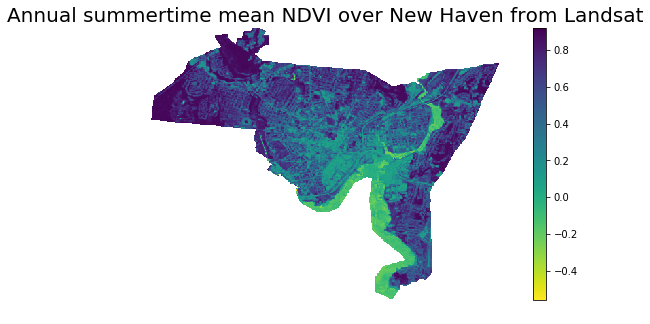

In [19]:

with rio.open('NewHaven_NDVI_Landsat.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    LST = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

fig, ax = plt.subplots(figsize = (12,5))
LST_plot = ax.imshow(LST, 
                       cmap='viridis_r')
ax.set_title("Annual summertime mean NDVI over New Haven from Landsat", fontsize= 20)
fig.colorbar(LST_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

In [6]:
with rio.open('NewHaven_NDVI.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    LST = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

fig, ax = plt.subplots(figsize = (12,5))
LST_plot = ax.imshow(LST, 
                       cmap='viridis_r')
ax.set_title("Annual summertime mean NDVI over New Haven from MODIS", fontsize= 20)
fig.colorbar(LST_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

NameError: name 'rio' is not defined

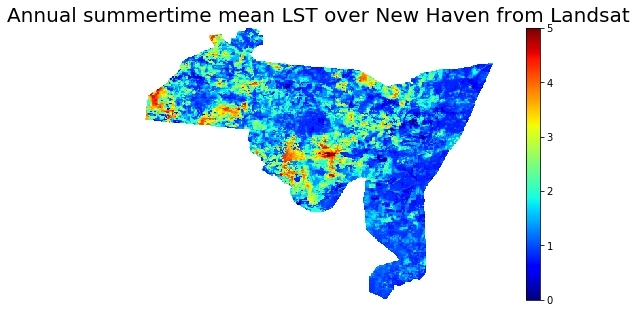

In [22]:
##Plot differences
with rio.open('NewHaven_BT_Landsat.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    LST = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    
with rio.open('NewHaven_Landsat_Radiance_BT_ENVI.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    BT = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)    

fig, ax = plt.subplots(figsize = (12,5))
LST_plot = ax.imshow(LST-273.-BT, 
                       cmap='jet',vmin=0, vmax=5)
ax.set_title("Annual summertime mean LST over New Haven from Landsat", fontsize= 20)
fig.colorbar(LST_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

In [10]:
#Read csv file created by GEE
Dat_red=pd.read_csv('NewHaven_redline.csv')
print(Dat_red)

            system:index  BT_Landsat        LST  LST_Landsat      NDVI  \
0   00000000000000000000  297.710400  33.275372    25.324602  0.765335   
1   00000000000000000001  297.274548  32.466421    24.871190  0.771240   
2   00000000000000000002  298.009295  32.954254    25.631943  0.719129   
3   00000000000000000003  296.881155  32.319299    24.482188  0.761044   
4   00000000000000000004  299.123822  31.444800    26.738060  0.746433   
5   00000000000000000005  297.365641  32.548717    24.962304  0.751516   
6   00000000000000000006  298.087689  30.931574    25.694781  0.746746   
7   00000000000000000007  298.966664  33.703290    26.588312  0.651857   
8   00000000000000000008  298.438581  33.300234    26.054127  0.749178   
9   00000000000000000009  300.764442  33.166100    28.441992  0.604516   
10  0000000000000000000a  297.671764  32.851075    25.289123  0.692942   
11  0000000000000000000b  299.003283  33.106857    26.635074  0.656651   
12  0000000000000000000c  299.955668  

            system:index  BT_Landsat        LST  LST_Landsat      NDVI  \
5   00000000000000000005  297.365641  32.548717    24.962304  0.751516   
6   00000000000000000006  298.087689  30.931574    25.694781  0.746746   
7   00000000000000000007  298.966664  33.703290    26.588312  0.651857   
9   00000000000000000009  300.764442  33.166100    28.441992  0.604516   
12  0000000000000000000c  299.955668  31.770395    27.596271  0.699785   
13  0000000000000000000d  300.352792  34.042739    27.991696  0.608776   
14  0000000000000000000e  299.306989  33.100894    26.952125  0.669416   
15  0000000000000000000f  299.118271  32.404283    26.759897  0.649938   
19  00000000000000000013  301.130067  32.054779    28.832215  0.582550   
20  00000000000000000014  299.649464  33.679420    27.326185  0.489616   
21  00000000000000000015  299.889264  32.403397    27.544848  0.592871   
22  00000000000000000016  298.795880  32.486624    26.435214  0.616097   
23  00000000000000000017  299.477497  

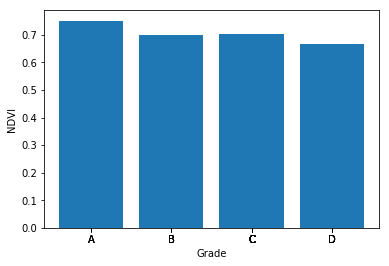

In [12]:
Dat_red[Dat_red["Tree_count"]==0]=np.nan
Dat_red=Dat_red.dropna(how='all')
print(Dat_red)
Dat1=Dat_red['holc_grade']
Dat2=Dat_red['NDVI']

plt.bar(Dat1, Dat2)
plt.xticks(Dat1)
plt.xlabel('Grade')
plt.ylabel('NDVI')
plt.show()